# TensorFlow

참고 : TensorFlow Machine Learning Cookbook

In [1]:
import tensorflow as tf
sess = tf.Session()

C:\Users\GIGABYTE\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 라소 회귀 및 리지 회귀 구현
> 규칙화 : 계수가 회귀 출력 값에 미치는 영향을 제한하는 방식 <br>
> 라소 회귀와 리지 회귀는 기울기를 제한하는 규칙화 항이 식에 추가된다. <br>
> 규칙화 항을 두는 이유 중 하나는 한 속성이 종속 변수에 주는 영향에 제한을 두고자 하는 것이다. <br>

In [3]:
def training(x_vals, y_vals, loss, batch_size):
    # 최적화 함수 선언
    my_opt = tf.train.GradientDescentOptimizer(0.001)
    train_step = my_opt.minimize(loss)

    # 변수 초기화
    init = tf.global_variables_initializer()
    sess.run(init)

    # 모델 학습
    loss_vec = []

    for i in range(1500):
        rand_index = np.random.choice(len(x_vals), size=batch_size)
        rand_x = np.transpose([x_vals[rand_index]])
        rand_y = np.transpose([y_vals[rand_index]])
    
        sess.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
        temp_loss = sess.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
        loss_vec.append(temp_loss[0])
    
        if (i+1) % 300 == 0:
            print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
            print('Loss = ' + str(sess.run(b)) + '\n')
    return A, b, loss_vec
    
def viz(x_vals, y_vals, A, b):
    [slope] = sess.run(A)
    [y_intercept] = sess.run(b)
    best_fit = []

    for i in x_vals:
        best_fit.append(slope * i + y_intercept)

    plt.plot(x_vals, y_vals, 'o', label='Data Points')
    plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
    plt.legend(loc='upper left')
    plt.title('Sepal Length vs Petal Width')
    plt.xlabel('Petal Width')
    plt.ylabel('Sepal Length')
    plt.show()

def loss_viz(loss_vec):
    plt.plot(loss_vec, 'k-')
    plt.title('Loss per Generation')
    plt.xlabel('Generation')
    plt.ylabel('Loss')
    plt.show()

##### 라소 회귀

In [4]:
# 데이터 로드
from sklearn import datasets
iris = datasets.load_iris()

x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

# 일괄 작업 크기 선언
batch_size = 50

# 플레이스홀더 및 변수 생성
x_data = tf.placeholder(shape=[None,1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# 모델 선언
model_output = tf.add(tf.matmul(x_data, A), b)

# 비용 함수 생성 : 연속 헤비사이드 계단 함수를 수정한 함수
lasso_param = tf.constant(0.9)
heavyside_step = tf.truediv(1., tf.add(1., tf.exp(tf.multiply(-50., tf.subtract(A, lasso_param)))))
regularization_param = tf.multiply(heavyside_step, 99.)
loss = tf.add(tf.reduce_mean(tf.square(y_target - model_output)), regularization_param)

A, b, loss_vec = training(x_vals, y_vals, loss, batch_size)

Step #300 A = [[0.7658069]] b = [[2.5444891]]
Loss = [[2.5444891]]

Step #600 A = [[0.75360554]] b = [[3.623089]]
Loss = [[3.623089]]

Step #900 A = [[0.7433828]] b = [[4.220039]]
Loss = [[4.220039]]

Step #1200 A = [[0.73423874]] b = [[4.554235]]
Loss = [[4.554235]]

Step #1500 A = [[0.72475827]] b = [[4.7411146]]
Loss = [[4.7411146]]



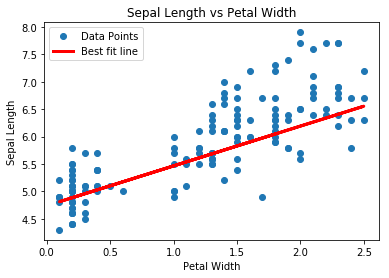

In [5]:
viz(x_vals, y_vals, A, b)

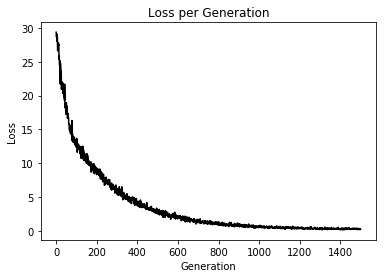

In [6]:
loss_viz(loss_vec)

##### 리지 회귀

In [7]:
# 데이터 로드
from sklearn import datasets
iris = datasets.load_iris()

x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

# 일괄 작업 크기 선언
batch_size = 50

# 플레이스홀더 및 변수 생성
x_data = tf.placeholder(shape=[None,1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# 모델 선언
model_output = tf.add(tf.matmul(x_data, A), b)

# 비용 함수 생성
ridge_param = tf.constant(1.)
ridge_loss = tf.reduce_mean(tf.square(A))
loss = tf.expand_dims(tf.add(tf.reduce_mean(tf.square(y_target - model_output)), tf.multiply(ridge_param, ridge_loss)), 0)

A, b, loss_vec = training(x_vals, y_vals, loss, batch_size)

Step #300 A = [[1.0902046]] b = [[3.2255619]]
Loss = [[3.2255619]]

Step #600 A = [[1.0559195]] b = [[3.8117754]]
Loss = [[3.8117754]]

Step #900 A = [[0.9034058]] b = [[4.204712]]
Loss = [[4.204712]]

Step #1200 A = [[0.77237284]] b = [[4.4985385]]
Loss = [[4.4985385]]

Step #1500 A = [[0.66675085]] b = [[4.71946]]
Loss = [[4.71946]]



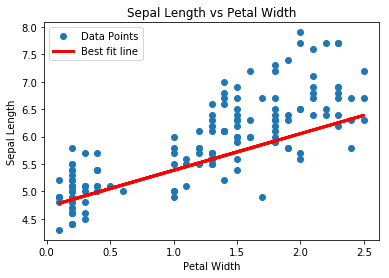

In [8]:
viz(x_vals, y_vals, A, b)

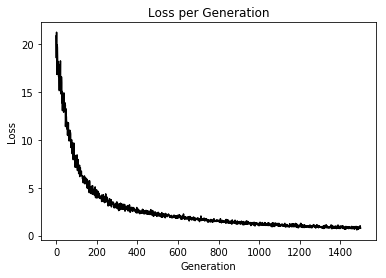

In [9]:
loss_viz(loss_vec)